In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning datasets

In [175]:
#loading datasets

dailyActivity_merged = pd.read_csv(r"C:\Users\College\Desktop\Projects\Bellabeat\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")
dailyCalories_merged = pd.read_csv(r"C:\Users\College\Desktop\Projects\Bellabeat\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyCalories_merged.csv")

In [176]:
dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [177]:
dailyActivity_merged_dup = dailyActivity_merged.duplicated().sum()
dailyCalories_merged_dup = dailyCalories_merged.duplicated().sum()

print('Number of duplicates')
print("dailyActivity_merged: ",dailyActivity_merged_dup)
print("dailyCalories_merged: ",dailyActivity_merged_dup)
#no duplicates

Number of duplicates
dailyActivity_merged:  0
dailyCalories_merged:  0


In [47]:
dailyActivity_merged['ActivityDate'].dtype

dtype('O')

Converting the datatypes

In [98]:
#converting ActivityDate to type datetime
dailyActivity_merged['ActivityDate'] = pd.to_datetime(dailyActivity_merged['ActivityDate'])

In [49]:
dailyActivity_merged['ActivityDate'].dtype

dtype('<M8[ns]')

In [50]:
# extracting the month from ActivityDate_month
dailyActivity_merged['ActivityDate_month'] = dailyActivity_merged['ActivityDate'].dt.month

In [51]:
dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDate_month
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,4
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,4
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,4


In [90]:
 dailyCalories_merged.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [95]:
# converting dailyCalories_merged to datetime
dailyCalories_merged['ActivityDay'] = pd.to_datetime(dailyCalories_merged['ActivityDay'])

In [96]:
# extracting month
dailyCalories_merged['ActivityDay_month'] = dailyCalories_merged['ActivityDay'].dt.month

In [97]:
dailyCalories_merged

,Id,ActivityDay,Calories,ActivityDay_month
0,1503960366,2016-04-12,1985,4
1,1503960366,2016-04-13,1797,4
2,1503960366,2016-04-14,1776,4
3,1503960366,2016-04-15,1745,4
4,1503960366,2016-04-16,1863,4
...,...,...,...,...
935,8877689391,2016-05-08,2847,5
936,8877689391,2016-05-09,3710,5
937,8877689391,2016-05-10,2832,5
938,8877689391,2016-05-11,3832,5


 Analysis 

In [52]:
# unique ids
dailyActivity_merged['Id'].unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391], dtype=int64)

In [58]:
#total steps taken by each user
total_steps = dailyActivity_merged.groupby(dailyActivity_merged['Id'])['TotalSteps'].sum()

<AxesSubplot:title={'center':'Comparing the maxium and minimum steps taken'}, xlabel='Id'>

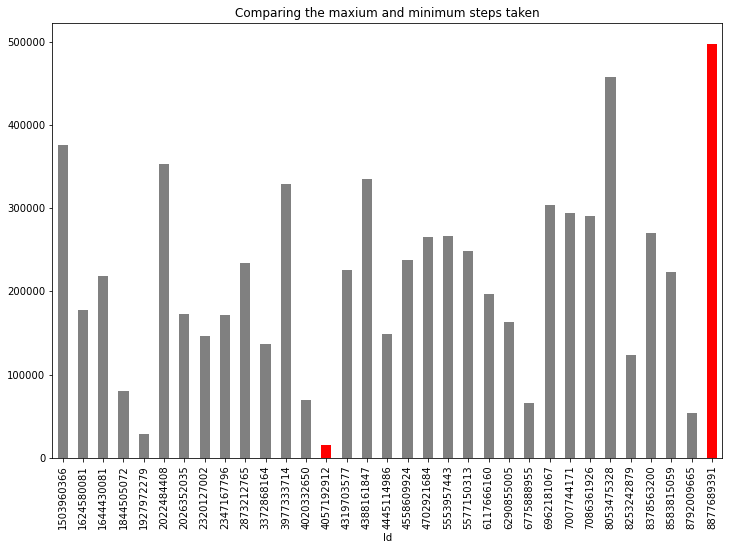

In [85]:
# plotting
max_value = max (total_steps)
min_value = min (total_steps)
total_steps.plot(kind = 'bar', figsize = (12,8), color = ['grey' if val!=max_value and val!= min_value 
                 else 'red' for val in total_steps], title = 'Comparing the maxium and minimum steps taken',
                )

In [141]:
calories = dailyCalories_merged.groupby(['Id','ActivityDay_month'])['Calories'].sum()

In [142]:
calories

Id          ActivityDay_month
1503960366  4                    35799
            5                    20510
1624580081  4                    28401
            5                    17583
1644430081  4                    54252
                                 ...  
8583815059  5                    31514
8792009665  4                    40069
            5                    16838
8877689391  4                    68480
            5                    37548
Name: Calories, Length: 63, dtype: int64

In [114]:
total_steps = dailyActivity_merged.groupby(['Id','ActivityDate_month'])['TotalSteps'].sum()

In [115]:
total_steps.head()

Id          ActivityDate_month
1503960366  4                     238807
            5                     136812
1624580081  4                     110060
            5                      68001
1644430081  4                     142055
Name: TotalSteps, dtype: int64

In [143]:
 df = pd.concat([calories, total_steps], axis = 1)


<AxesSubplot:title={'center':'Calories VS Total Steps'}, xlabel='Users'>

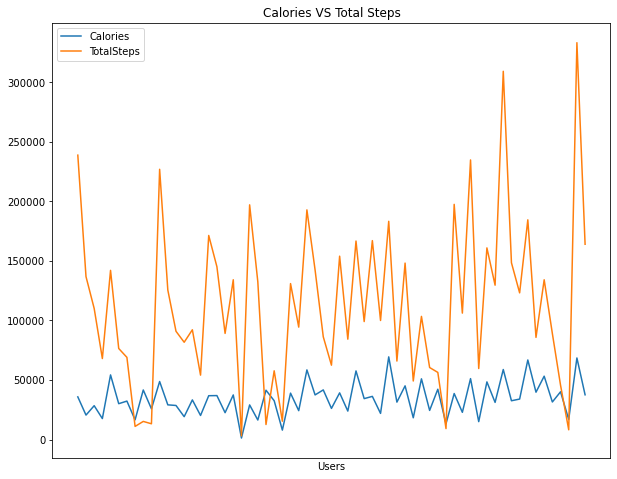

In [164]:
df.plot(figsize = (10,8),xticks = [], xlabel = 'Users',title = 'Calories VS Total Steps')
